In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random


In [0]:
np.random.seed(0)


In [66]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

(60000, 28, 28)
(10000, 28, 28)


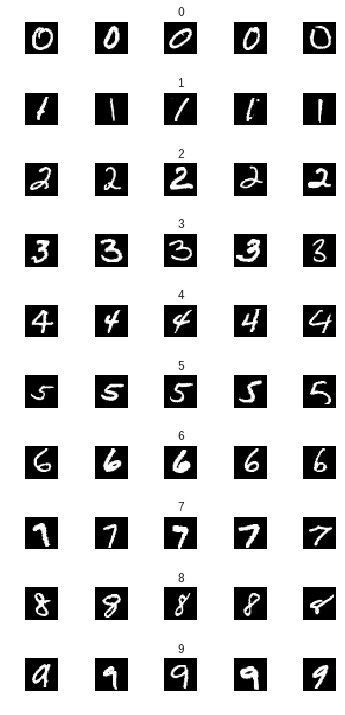

In [67]:
num_of_samples=[]
 
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


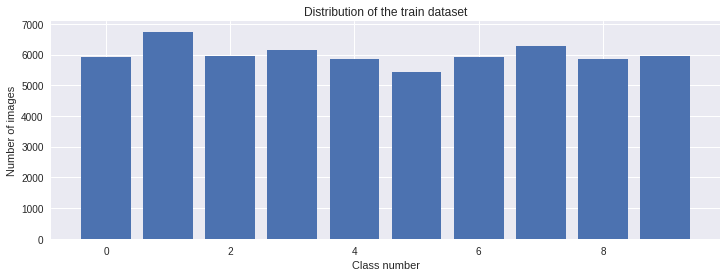

In [68]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
#define the leNet_model method
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5),
                   input_shape=(28, 28, 1),
                  activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), 
               loss='categorical_crossentropy',
               metrics=['accuracy'])
  return model

In [73]:
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

In [74]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_split=0.1, 
                    batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 49us/step - loss: 0.2466 - acc: 0.9211 - val_loss: 0.0520 - val_acc: 0.9845
Epoch 2/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0671 - acc: 0.9796 - val_loss: 0.0416 - val_acc: 0.9863
Epoch 3/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0588 - acc: 0.9823 - val_loss: 0.0386 - val_acc: 0.9878
Epoch 4/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0491 - acc: 0.9848 - val_loss: 0.0400 - val_acc: 0.9885
Epoch 5/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0481 - acc: 0.9850 - val_loss: 0.0471 - val_acc: 0.9870
Epoch 6/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0405 - acc: 0.9875 - val_loss: 0.0407 - val_acc: 0.9898
Epoch 7/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0358 - acc: 0.9889 - val_loss: 0.0372 - val_acc:

Text(0.5, 0, 'epoch')

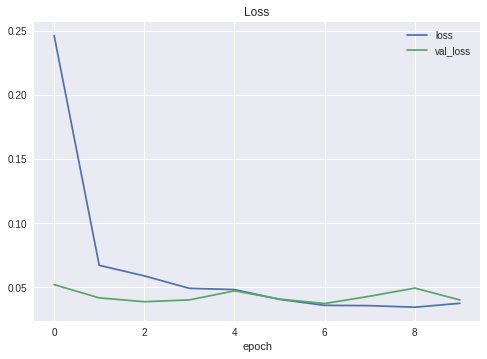

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

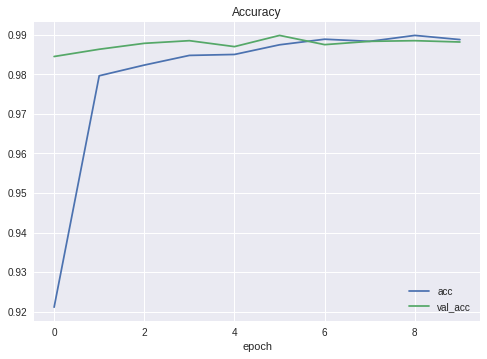

In [76]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

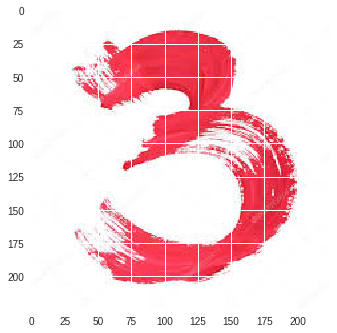

In [82]:
import requests
from PIL import Image

url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
#url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

[[  0   2   2   0   0   0   0   0   1   0   0   0   0   0   0   4   1   0
    0   0   0   0   1   0   0   0   0   0]
 [  2   1   1   0   0   0   0   1   0   1   0   0   3   4   5   2   1   0
    0   0   0   1   0   1   0   0   0   0]
 [  1   0   0   1   0   0   1   2   0   2  16 179 179 176 183 184 168   4
    0   0   1   0   0   0   1   0   0   1]
 [  0   0   0   0   1   2   3 172  10 187 175 178 179 176 177 180 182 181
    9   1   0   0   0   0   0   2   1   0]
 [  0   0   0   0   1   4  36  90 170 181 186 183 175 176 177 176 176 182
  179   2   0   0   0   0   0   0   1   0]
 [  1   0   0   5 172  17   2 154 172 157 178 189 182 182 179 182 171 183
  171   4   0   1   0   3   1   0   0   0]
 [  0   1   1   0  86 103  51  82 152 171 167 177 179 179 178 177 171 187
  175   1   0   0   3   1   0   0   0   0]
 [  1   0   1   0   7 164  75  60 161 170 178 123  18  97 198 187 180 171
  164   0   1   2   1   1   0   0   0   0]
 [  0   0   0   1   0   3  76 172 133 165   5   1   0   1   7 19

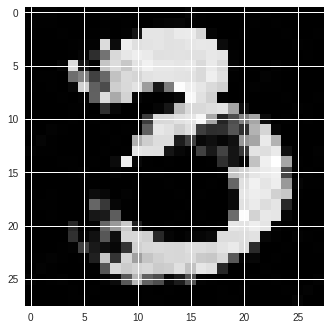

In [83]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28 ))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY) #(28, 28)
image = cv2.bitwise_not(gray_scale)

plt.imshow(image, cmap=plt.get_cmap('gray'))
print(image)

In [0]:
image = image / 255
image = image.reshape(1, 28, 28, 1)

In [85]:
prediction = model.predict_classes(image)
print("predicted digit:", str(prediction))

predicted digit: [3]


In [86]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

<class 'list'>
Test Score: 0.04198194400730654
Test Accuracy: 0.9891


In [94]:
layer1 = Model(inputs = model.layers[0].input,
               outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input,
               outputs = model.layers[2].output)
visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


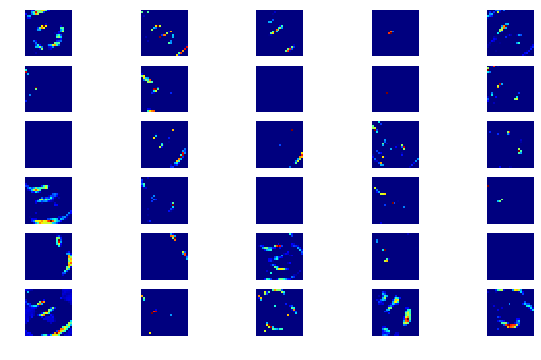

In [97]:
plt.figure(figsize=(10, 6))
for i in range(30):
  plt.subplot(6, 5, i + 1)
  plt.imshow(visual_layer1[0, :, :, i],
            cmap=plt.get_cmap('jet'))
  plt.axis('off')
  

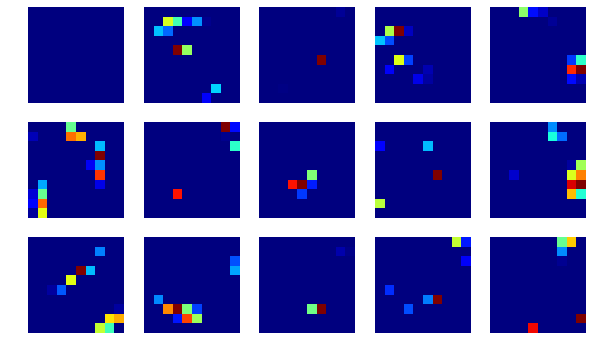

In [98]:
plt.figure(figsize=(10, 6))
for i in range(15):
  plt.subplot(3, 5, i + 1)
  plt.imshow(visual_layer2[0, :, :, i],
            cmap=plt.get_cmap('jet'))
  plt.axis('off')